<a href="https://colab.research.google.com/github/atharvadesai1/IPD-Project/blob/main/stress_detection_redit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/merged.csv')
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


# New Section

In [3]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,3553.000000,3553.000000,3553.000000,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,...,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,13774.009288,0.522657,0.790644,1.517999e+09,19.543203,4.688569,85.929918,35.140816,40.437610,67.622440,...,1.086601,1.119619,1.000225,1.722884,1.535102,1.879306,0.846088,9.747819,5.458644,0.041667
std,17424.172858,0.499557,0.218379,1.552489e+07,87.263634,3.301673,32.105144,26.452202,31.449231,32.658996,...,0.115371,0.086195,0.006708,0.048044,0.102542,0.058354,0.174756,20.324300,2.526593,0.195195
min,2.000000,0.000000,0.000000,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-2.318095,-1.000000
25%,913.000000,0.000000,0.600000,1.509657e+09,2.000000,2.475093,65.000000,12.410000,11.820000,43.370000,...,1.000000,1.000000,1.000000,1.691880,1.468180,1.841840,0.750000,2.000000,3.718596,-0.068939
50%,1860.000000,1.000000,0.800000,1.516974e+09,5.000000,4.348333,81.000000,29.600000,33.190000,81.220000,...,1.000000,1.142900,1.000000,1.721310,1.528700,1.878240,0.900000,5.000000,5.219455,0.043384
75%,25733.000000,1.000000,1.000000,1.530921e+09,10.000000,6.537891,101.000000,54.500000,68.290000,96.400000,...,1.142900,1.142900,1.000000,1.752050,1.595740,1.915650,1.000000,10.000000,6.891960,0.164286
max,55783.000000,1.000000,1.000000,1.542592e+09,1687.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.777800,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [4]:
df.isnull()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3550,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3551,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [19]:
elements = df['subreddit'].value_counts()
elements

ptsd                711
relationships       694
anxiety             650
domesticviolence    388
assistance          355
survivorsofabuse    315
homeless            220
almosthomeless       99
stress               78
food_pantry          43
Name: subreddit, dtype: int64

# **Data Visualization**

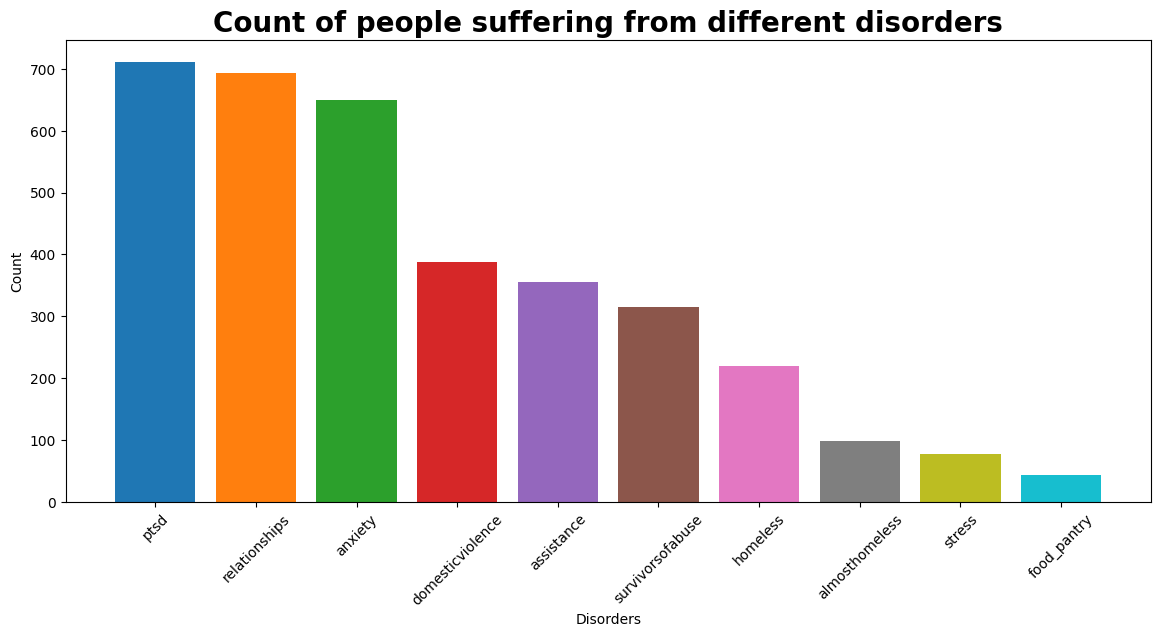

694

In [104]:

plt.figure(figsize=(14, 6))
relationships = df[(df['subreddit']=='relationships')]
ptsd = df[(df['subreddit']=='ptsd')]
anxiety = df[(df['subreddit']=='anxiety')]
domesticviolence = df[(df['subreddit']=='domesticviolence')]
survivorsofabuse = df[(df['subreddit']=='survivorsofabuse')]
homeless = df[(df['subreddit']=='homeless')]
assistance = df[(df['subreddit']=='assistance')]
food_pantry = df[(df['subreddit']=='food_pantry')]
stress = df[(df['subreddit']=='stress')]
almosthomeless = df[(df['subreddit']=='almosthomeless')]

categories = ['ptsd','relationships','anxiety','domesticviolence','assistance','survivorsofabuse','homeless','almosthomeless','stress','food_pantry']
count = [len(ptsd),len(relationships),len(anxiety),len(domesticviolence),len(assistance),len(survivorsofabuse),len(homeless),len(almosthomeless),len(stress),len(food_pantry)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.xlabel('Disorders')
plt.ylabel('Count')
ax = plt.gca()
ax.set_title('Count of people suffering from different disorders',fontsize=20,fontweight='bold')
plt.bar(categories,count,color=colors)
plt.xticks(rotation=45)
plt.show()

len(relationships)

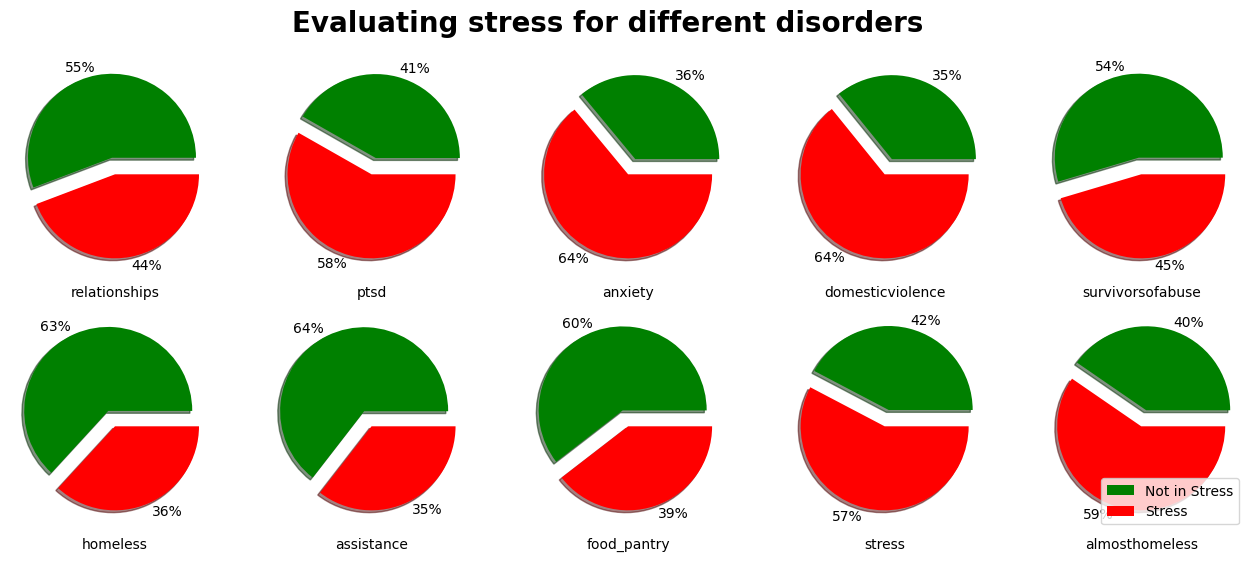

In [136]:
# sip = np.array([65,35])
mylabels = ["Not in Stress","Stress"]
myexplode = [0.2,0]
colors = ['green','red']

# plt.figure(figsize=(16, 6))
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
fig.suptitle("Evaluating stress for different disorders",fontsize=20,fontweight='bold')

# plt.pie(sip,labels = mylabels, explode = myexplode, colors=colors, shadow =True)
# plt.show()
s_relationships = df[(df['subreddit']=='relationships') & (df['label']==1)]
ns_relationships = df[(df['subreddit']=='relationships') & (df['label']==0)]
percent_relationships = [(len(ns_relationships)/len(relationships))*100,(len(s_relationships)/len(relationships))*100]
lab = [str(int((len(ns_relationships)/len(relationships))*100))+'%' , str(int((len(s_relationships)/len(relationships))*100))+'%']
plt.subplot(2,5,1)
plt.xlabel("relationships")
plt.pie(percent_relationships,labels = lab, explode = myexplode, colors=colors,shadow =True)

s_ptsd = df[(df['subreddit']=='ptsd') & (df['label']==1)]
ns_ptsd = df[(df['subreddit']=='ptsd') & (df['label']==0)]
percent_ptsd = [(len(ns_ptsd)/len(ptsd))*100,(len(s_ptsd)/len(ptsd))*100]
lab = [str(int((len(ns_ptsd)/len(ptsd))*100))+'%' , str(int((len(s_ptsd)/len(ptsd))*100))+'%']
plt.subplot(2,5,2)
plt.xlabel("ptsd")
plt.pie(percent_ptsd,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_anxiety = df[(df['subreddit']=='anxiety') & (df['label']==1)]
ns_anxiety = df[(df['subreddit']=='anxiety') & (df['label']==0)]
percent_anxiety = [(len(ns_anxiety)/len(anxiety))*100,(len(s_anxiety)/len(anxiety))*100]
lab = [str(int((len(ns_anxiety)/len(anxiety))*100))+'%' , str(int((len(s_anxiety)/len(anxiety))*100))+'%']
plt.subplot(2,5,3)
plt.xlabel("anxiety")
plt.pie(percent_anxiety,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_domesticviolence = df[(df['subreddit']=='domesticviolence') & (df['label']==1)]
ns_domesticviolence = df[(df['subreddit']=='domesticviolence') & (df['label']==0)]
percent_domesticviolence = [(len(ns_domesticviolence)/len(domesticviolence))*100,(len(s_domesticviolence)/len(domesticviolence))*100]
lab = [str(int((len(ns_domesticviolence)/len(domesticviolence))*100))+'%' , str(int((len(s_domesticviolence)/len(domesticviolence))*100))+'%']
plt.subplot(2,5,4)
plt.xlabel("domesticviolence")
plt.pie(percent_domesticviolence,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_survivorsofabuse = df[(df['subreddit']=='survivorsofabuse') & (df['label']==1)]
ns_survivorsofabuse = df[(df['subreddit']=='survivorsofabuse') & (df['label']==0)]
percent_survivorsofabuse = [(len(ns_survivorsofabuse)/len(survivorsofabuse))*100,(len(s_survivorsofabuse)/len(survivorsofabuse))*100]
lab = [str(int((len(ns_survivorsofabuse)/len(survivorsofabuse))*100))+'%' , str(int((len(s_survivorsofabuse)/len(survivorsofabuse))*100))+'%']
plt.subplot(2,5,5)
plt.xlabel("survivorsofabuse")
plt.pie(percent_survivorsofabuse,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_homeless = df[(df['subreddit']=='homeless') & (df['label']==1)]
ns_homeless = df[(df['subreddit']=='homeless') & (df['label']==0)]
percent_homeless = [(len(ns_homeless)/len(homeless))*100,(len(s_homeless)/len(homeless))*100]
lab = [str(int((len(ns_homeless)/len(homeless))*100))+'%' , str(int((len(s_homeless)/len(homeless))*100))+'%']
plt.subplot(2,5,6)
plt.xlabel("homeless")
plt.pie(percent_homeless,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_assistance = df[(df['subreddit']=='assistance') & (df['label']==1)]
ns_assistance = df[(df['subreddit']=='assistance') & (df['label']==0)]
percent_assistance = [(len(ns_assistance)/len(assistance))*100,(len(s_assistance)/len(assistance))*100]
lab = [str(int((len(ns_assistance)/len(assistance))*100))+'%' , str(int((len(s_assistance)/len(assistance))*100))+'%']
plt.subplot(2,5,7)
plt.xlabel("assistance")
plt.pie(percent_assistance,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_food_pantry = df[(df['subreddit']=='food_pantry') & (df['label']==1)]
ns_food_pantry = df[(df['subreddit']=='food_pantry') & (df['label']==0)]
percent_food_pantry = [(len(ns_food_pantry)/len(food_pantry))*100,(len(s_food_pantry)/len(food_pantry))*100]
lab = [str(int((len(ns_food_pantry)/len(food_pantry))*100))+'%' , str(int((len(s_food_pantry)/len(food_pantry))*100))+'%']
plt.subplot(2,5,8)
plt.xlabel("food_pantry")
plt.pie(percent_food_pantry,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_stress = df[(df['subreddit']=='stress') & (df['label']==1)]
ns_stress = df[(df['subreddit']=='stress') & (df['label']==0)]
percent_stress = [(len(ns_stress)/len(stress))*100,(len(s_stress)/len(stress))*100]
lab = [str(int((len(ns_stress)/len(stress))*100))+'%' , str(int((len(s_stress)/len(stress))*100))+'%']
plt.subplot(2,5,9)
plt.xlabel("stress")
plt.pie(percent_stress,labels = lab, explode = myexplode, colors=colors, shadow =True)

s_almosthomeless = df[(df['subreddit']=='almosthomeless') & (df['label']==1)]
ns_almosthomeless = df[(df['subreddit']=='almosthomeless') & (df['label']==0)]
percent_almosthomeless = [(len(ns_almosthomeless)/len(almosthomeless))*100,(len(s_almosthomeless)/len(almosthomeless))*100]
lab = [str(int((len(ns_almosthomeless)/len(almosthomeless))*100))+'%' , str(int((len(s_almosthomeless)/len(almosthomeless))*100))+'%']
plt.subplot(2,5,10)
plt.xlabel("almosthomeless")
plt.pie(percent_almosthomeless,labels = lab, explode = myexplode, colors=colors, shadow =True)

plt.legend(mylabels, loc='lower right')
plt.show()

In [6]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub('https?://\S+/www\. \S+', ' ', text)
    text = re.sub('<. *?>+', ' ', text)
    text = re.sub(' [%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(' \n',' ', text)
    text = re.sub(' \w*\d\w*' ,' ', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text =" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ') ]
    text = " ".join(text)
    return text
df["text"] = df["text"].apply(clean)

In [9]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

In [10]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

x = np.array (df["text"])
y = np.array (df["label"])

cv = CountVectorizer ()
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33)

  (0, 5597)	1
  (0, 9601)	2
  (0, 10464)	1
  (0, 6470)	1
  (0, 5906)	1
  (0, 7403)	1
  (0, 9448)	1
  (0, 5679)	1
  (0, 660)	2
  (0, 3932)	1
  (0, 4511)	2
  (0, 5549)	1
  (0, 10441)	1
  (0, 6617)	1
  (0, 4682)	2
  (0, 4441)	1
  (0, 7323)	1
  (0, 521)	1
  (0, 3831)	1
  (0, 5044)	1
  (0, 4683)	1
  (0, 9719)	1
  (1, 4511)	1
  (1, 5802)	1
  (1, 3947)	1
  :	:
  (3551, 4317)	1
  (3551, 9157)	1
  (3551, 3248)	1
  (3551, 5118)	1
  (3551, 5308)	1
  (3551, 4996)	1
  (3552, 6337)	1
  (3552, 3348)	1
  (3552, 9765)	1
  (3552, 8243)	2
  (3552, 9455)	1
  (3552, 6176)	1
  (3552, 7523)	1
  (3552, 2871)	1
  (3552, 4781)	1
  (3552, 9865)	1
  (3552, 6136)	2
  (3552, 9866)	1
  (3552, 8317)	1
  (3552, 8688)	1
  (3552, 6052)	1
  (3552, 10743)	1
  (3552, 2605)	1
  (3552, 3350)	1
  (3552, 3056)	1


In [11]:
from sklearn.naive_bayes import BernoulliNB
f1=BernoulliNB()
f1.fit(xtrain,ytrain)

from sklearn.svm import SVC
f2 = SVC(kernel = 'rbf', random_state = 0)
f2.fit(xtrain, ytrain)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [12]:
'''user=input("Enter the text:")
data=cv.transform([user]).toarray()
output=model.predict(data)
if output==1:
  print("Yes,the person is in stress")
else:
  print("Not in stress")'''

'user=input("Enter the text:")\ndata=cv.transform([user]).toarray()\noutput=model.predict(data)\nif output==1:\n  print("Yes,the person is in stress")\nelse:\n  print("Not in stress")'



********Random Forest************
              precision    recall  f1-score   support

           0       0.73      0.56      0.63       572
           1       0.66      0.80      0.72       601

    accuracy                           0.68      1173
   macro avg       0.69      0.68      0.68      1173
weighted avg       0.69      0.68      0.68      1173



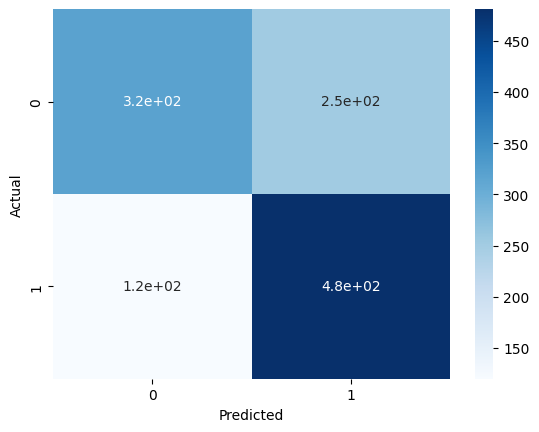



**********Naive Bayes**********
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       572
           1       0.67      0.84      0.74       601

    accuracy                           0.70      1173
   macro avg       0.72      0.70      0.70      1173
weighted avg       0.72      0.70      0.70      1173



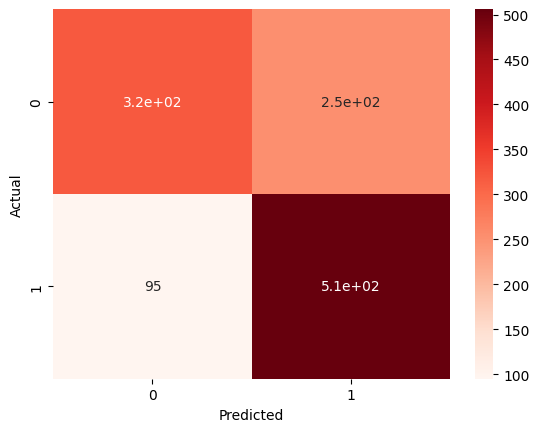



**********SVM**********
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       572
           1       0.71      0.71      0.71       601

    accuracy                           0.70      1173
   macro avg       0.70      0.70      0.70      1173
weighted avg       0.70      0.70      0.70      1173



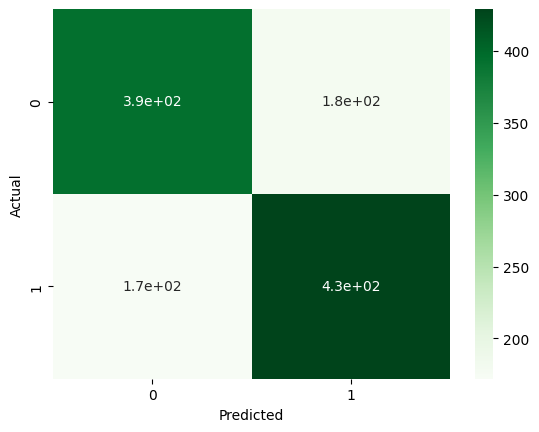

In [13]:
ypred = model.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(ytest,ypred)
print("\n\n********Random Forest************")
# print(cm1)
print(classification_report(ytest,ypred))

sns.heatmap(cm1,cmap="Blues",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ypred = f1.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm2 = confusion_matrix(ytest,ypred)
print("\n\n**********Naive Bayes**********")
# print(cm2)
print(classification_report(ytest,ypred))

sns.heatmap(cm2,cmap="Reds",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ypred = f2.predict(xtest)
from sklearn.metrics import confusion_matrix,classification_report
cm3 = confusion_matrix(ytest,ypred)
print("\n\n**********SVM**********")
# print(cm3)
print(classification_report(ytest,ypred))

sns.heatmap(cm3,cmap="Greens",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()